In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set constant

N = 500000 # number of samples
n_bins = 200 # number of bins in histogram

mu = 1.83e-6 #dynamic viscosity of seawater
rou_p = 2.6e3 #density of particle
rou_f = 1.027e3 #density of seawater
g = 9.81 #acceleration of gravity 

#Assumptions
h = 4000 # Mean depth of Southern Ocean
current = 0.3 # velocity of ACC
diff = 0.1 * current * 1e5 # diffusivity = 0.1 * velocity * Le

# Assumptions of the distribution
stdev = np.log(2) # Standard deviation (sigma) of the grain size distribution  
mean = np.log(8e-6) # Mean the underlying normal distribution of the source grain size distribution 

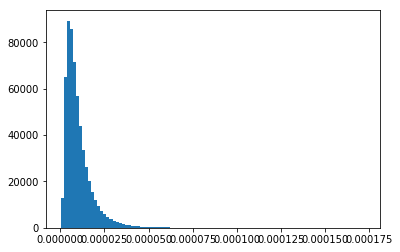

In [3]:
# draw N diameter samples from the lognormal distribution
dia = np.random.lognormal(mean,stdev,N)
# plot a histogram (normalized)
plt.hist(dia, 100, normed=True, align='mid') 
plt.show()

In [4]:
#calculate the distance grouped by size

k = (rou_p-rou_f)*g/mu/18

dist = [[] for i in range(7)]
# dist[0] : 0-2
# dist[1] : 2-4
# dist[2] : 4-10
# dist[3] : 10-20
# dist[4] : 20-30
# dist[5] : 30-40
# dist[6] : >40

for sediment in dia:

    v = k * np.square(sediment) # Stokes' law
    t = h / v # time taken 
    x = t * current # distance traveled without diffusion
    
    eta = np.random.normal(0,np.sqrt(2),1)
    x_hat = eta[0] * np.sqrt(diff*t)
    if sediment < 2e-6 :
        dist[0].append(x+x_hat)
    elif sediment < 4e-6 :
        dist[1].append(x+x_hat)
    elif sediment < 1e-5 :
        dist[2].append(x+x_hat)
    elif sediment < 2e-5 :
        dist[3].append(x+x_hat)
    elif sediment < 3e-5 :
        dist[4].append(x+x_hat)
    elif sediment < 4e-5 :
        dist[5].append(x+x_hat)
    else :
        dist[6].append(x+x_hat)


0.022382


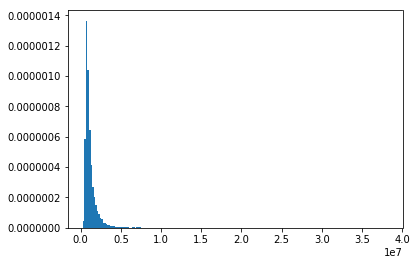

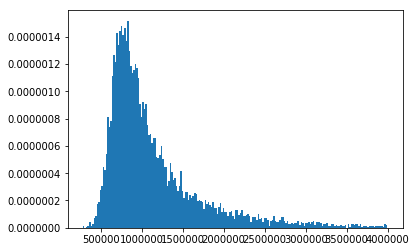

In [5]:
# for each group plot a histogram and print its percentage

# group 0-2 
index = 0
print(len(dist[index])/float(N))
plt.hist(dist[index], n_bins, normed=True, align='mid')
plt.show()
# discard data which are too far away

TMAX = 4e6
dist_a = []
for i in dist[index]:
    if i < TMAX:
        dist_a.append(i)
dist[0] = dist_a;

plt.hist(dist[0], n_bins, normed=True, align='mid')
plt.show()

0.136184


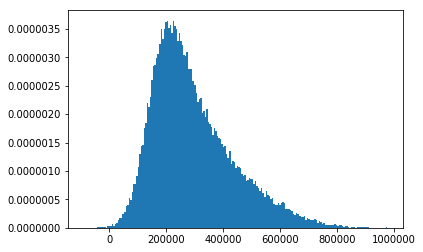

In [6]:
# for each group plot a histogram and print its percentage

# group 2-4 
index = 1
print(len(dist[index])/float(N))
plt.hist(dist[index], n_bins, normed=True, align='mid')
plt.show()


0.466782


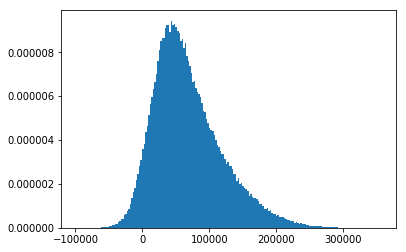

In [7]:
# for each group plot a histogram and print its percentage

# group 4-10
index = 2
print(len(dist[index])/float(N))
plt.hist(dist[index], n_bins, normed=True, align='mid')
plt.show()

0.281292


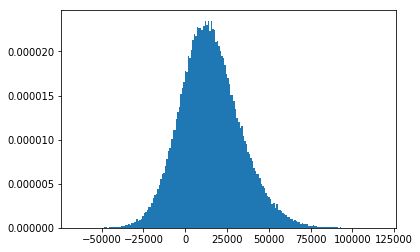

In [8]:
# for each group plot a histogram and print its percentage

# group 10-20
index = 3
print(len(dist[index])/float(N))
plt.hist(dist[index], n_bins, normed=True, align='mid')
plt.show()

0.0649


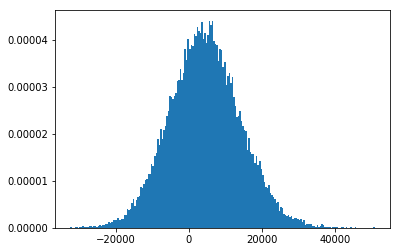

In [9]:
# for each group plot a histogram and print its percentage

# group 20-30
index = 4
print(len(dist[index])/float(N))
plt.hist(dist[index], n_bins, normed=True, align='mid')
plt.show()

0.01818


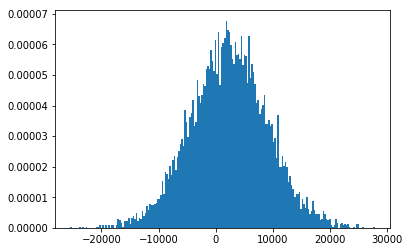

In [10]:
# for each group plot a histogram and print its percentage

# group 30-40 
index = 5
print(len(dist[index])/float(N))
plt.hist(dist[index], n_bins, normed=True, align='mid')
plt.show()

0.01028


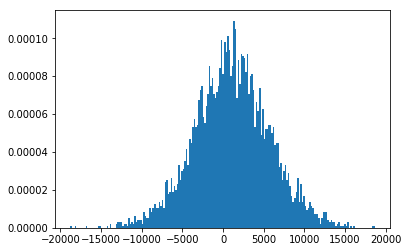

In [11]:
# for each group plot a histogram and print its percentage

# group >40
index =6
print(len(dist[index])/float(N))
plt.hist(dist[index], n_bins, normed=True, align='mid')
plt.show()

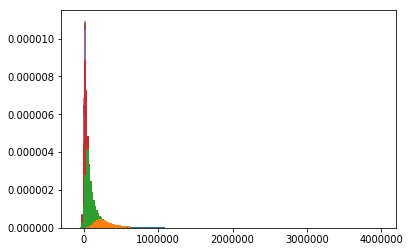

In [12]:

plt.hist(dist, n_bins, normed=True, histtype = 'bar',align='mid',stacked= True)
plt.show()

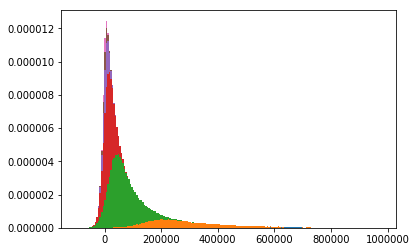

In [13]:
# ugly, discard distance larger than 700000 in group 0-2

TMAX = 7e5
dist_a = []
for i in dist[0]:
    if i < TMAX:
        dist_a.append(i)
dist[0] = dist_a;
plt.hist(dist, n_bins, normed=True, histtype = 'bar',stacked= True)
plt.show()

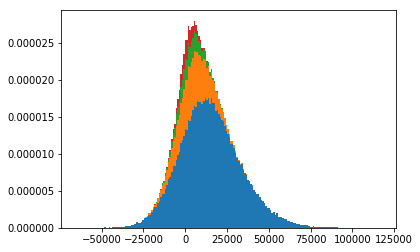

In [14]:
# stacked histogram only contains >10 groups

plt.hist(dist[3:], n_bins, normed=True, histtype = 'bar',stacked= True)
plt.show()